In [1]:
from tensorflow.examples.tutorials.mnist import input_data

# Download MNIST data
mnist = input_data.read_data_sets('/tmp/data/')

import tensorflow as tf

# Start interatctive session
session = tf.InteractiveSession()

# Input image
image = tf.placeholder(tf.float32, [None, 784])

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
def train_autoencoder(image, reconstruction, iterations=1000, batch_size=100):
    # Minimizing mean squared error
    cost = tf.reduce_mean((reconstruction - image) ** 2)
    train_step = tf.train.AdamOptimizer().minimize(cost)

    # Initialize variables
    tf.initialize_all_variables().run()

    # Train the model
    for i in range(iterations):
        batch_image, _ = mnist.train.next_batch(batch_size)
        train_step.run({image: batch_image})

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def visualize_autoencoder(code, reconstruction, size):
    reconstruction_values = reconstruction.eval(feed_dict={code: np.identity(size)})

    _, a = plt.subplots(1, size, figsize=(50, 10))
    for i in range(size):
        image = reconstruction_values[i].reshape((28, 28))
        a[i].imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [4]:
# Initialization scheme
stddev = 0.01
bias_init = 0.01

# Hidden layer size
code_size = 10

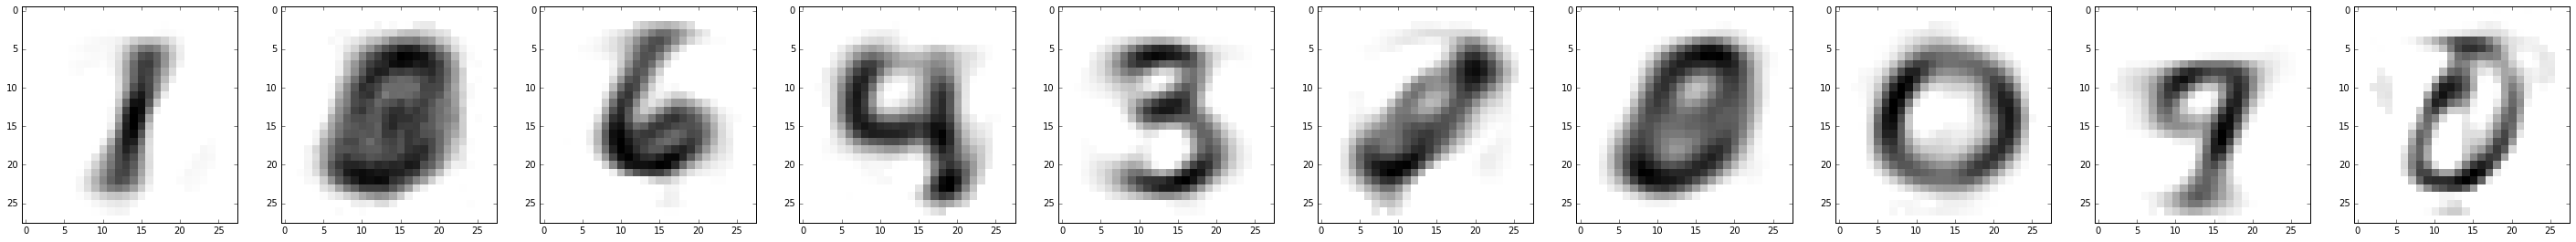

In [5]:
# Encoding layer
W1 = tf.Variable(tf.truncated_normal([784, code_size], stddev=stddev))
b1 = tf.Variable(tf.constant(bias_init, shape=[code_size]))

# Hidden variable of 10 dimensions (named for visualization later)
code = tf.nn.softmax(tf.matmul(image, W1) + b1, name='code')

# Decoding layer
W2 = tf.Variable(tf.truncated_normal([code_size, 784], stddev=stddev))
b2 = tf.Variable(tf.constant(bias_init, shape=[784]))
reconstruction = tf.nn.relu(tf.matmul(code, W2) + b2)

# Train and visualize autoencoder
train_autoencoder(image, reconstruction)
visualize_autoencoder(code, reconstruction, code_size)